# Code for the topic modelling

Tuto - https://www.youtube.com/watch?v=arMTVXEbV9Q

## Import packages

In [22]:
# nltk
import nltk
# gensim
import gensim
import gensim.corpora as corpora
# spacy
import spacy
#vis
import pyLDAvis
import pyLDAvis.gensim

In [23]:
import pandas as pd

## Import data

In [24]:
db_init = pd.read_csv("C:/Users/valentin.stuhlfauth/OneDrive - univ-lyon2.fr/2_2025-DUT systematic review/2_Topic modelling/0_code/2025_Pol4PED_systematic_review/0_data/2025-02-27_Screening_result.csv",sep=';',encoding='ISO-8859-1')

In [25]:
db_init["Approach"].unique()

array(['Conceptual', 'Methodological', 'Qualitative', nan, 'Reviews',
       'Quantitative', 'Modelling', 'Ingineering'], dtype=object)

In [26]:
db_init=db_init.reset_index()

In [27]:
data=db_init[db_init["Approach"].isin(['Conceptual', 'Methodological', 'Qualitative'])]

In [28]:
df_text = pd.DataFrame()
df_text["text_topic"] = data["Article Title"] + " " + data["Abstract"]
df_text = df_text["text_topic"]

## Pretreatment

### Lemmatisation, generation and bigrams

In [29]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

In [30]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

In [31]:
data_words = gen_words(lemmatization(df_text))

In [11]:
#BIGRAMS AND TRIGRAMS
## threshold (float, optional) – Represent a score threshold for forming the phrases (higher means fewer phrases) (init = 100)
bigram_phrases = gensim.models.Phrases(data_words, min_count=100, threshold=1)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=1)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

print (data_bigrams_trigrams[0:3])

[['theory', 'paper_analyze', 'relationship', 'low_carbon_city', 'climate_change', 'background_global', 'warming', 'low_carbon_city', 'construction', 'important', 'measure', 'mitigate_climate_change', 'crisis', 'low_carbon_urban_planning', 'key', 'technology_low_carbon', 'urban_construction', 'research', 'aspect_low_carbon', 'urban_planning', 'theory', 'concept', 'practice', 'low', 'zero', 'carbon', 'community_low_carbon', 'city_development', 'future', 'sum', 'low_carbon_urban_planning', 'research', 'progress', 'domestic', 'overseas', 'put', 'future', 'trend', 'low_carbon_urban_planning', 'research', 'aspect', 'demarcation', 'path_low_carbon', 'city_low_carbon', 'urban_planning', 'construction', 'popularity', 'low_carbon_technology', 'enforcement', 'mechanism', 'innovation', 'low_carbon_city', 'construction'], ['carbon', 'background_global', 'warming', 'energy_crisis', 'low_carbon_economy', 'low_carbon_city', 'gradually', 'call', 'people', 'attention', 'core', 'low_carbon_city', 'econom

### TF-IDF (play with hypervalue)

In [11]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.02
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

In [95]:
list(dict.fromkeys(words))

['use',
 'urban',
 'base',
 'low_carbon',
 'impact',
 'level',
 'city',
 'study',
 'development',
 'policy',
 'model',
 'analysis',
 'paper',
 'promote',
 'carbon_emission',
 'energy',
 'high',
 'reduce',
 'effect',
 'research',
 'challenge',
 'focus',
 'provide',
 'method',
 'also',
 'find',
 'build',
 'potential',
 'role',
 'affect',
 'approach',
 'goal',
 'need',
 'improve',
 'low_carbon_city',
 'datum',
 'different',
 'result',
 'increase',
 'area',
 'system',
 'low',
 'show',
 'such',
 'carbon',
 'develop',
 'more',
 'important',
 'sustainable',
 'large',
 'design',
 'local',
 'contribute',
 'include',
 'however',
 'apply',
 'emission',
 'consider',
 'construction',
 'analyze',
 'economic',
 'green',
 'strategy',
 'explore',
 'support',
 'evidence',
 'achieve',
 'implementation',
 'result_show',
 'take',
 'evaluate',
 'community',
 'concept',
 'innovation',
 'finally',
 'finding',
 'term',
 'transition',
 'comprehensive',
 'reveal',
 'decrease',
 'value',
 'measure',
 'environment

### Manual Thesaurus

In [84]:
# Stop words 
stop_words=[]
stop_words.append(['CO2'])

print(stop_words)

[['CO2']]


In [85]:
# Stop words suppression 
data_bigrams_trigrams_stop = [[mot for mot in doc if not mot in stop_words] for doc in data_bigrams_trigrams]

## Topic modelling global

### Dictionary

In [32]:
data_bigrams_trigrams = data_words

In [33]:
from gensim.corpora import Dictionary
dico = Dictionary(data_bigrams_trigrams)
print(dico)

Dictionary<5840 unique tokens: ['analyze', 'aspect', 'background', 'carbon', 'change']...>


In [34]:
id2word = corpora.Dictionary(data_bigrams_trigrams)

corpus = []
for text in data_bigrams_trigrams:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 1), (1, 2), (2, 1), (3, 13), (4, 2), (5, 5), (6, 2), (7, 1), (8, 1), (9, 4), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1)]
analyze


### LDA (init passes=10)

alpha: Controls the sparsity of the document-topic distribution.
- A small alpha will lead to fewer topics being assigned to each document (sparse document-topic distribution).
- A larger alpha will assign more topics to each document (denser document-topic distribution).

beta (or eta): Controls the sparsity of the topic-term distribution.
- A small beta means that topics will have fewer terms associated with them.
- A large beta allows more terms per topic.

BEST:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus[:-1],
                                           id2word=id2word,
                                           num_topics=25,
                                           #random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha=0.0005,
                                           eta= 0.2)

In [35]:
# lissing topic appartenance = alpha (close to 0 = crisp (binary) / more than 10 = lissing of the results) (deffault = 1/num_topics // "auto")
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus[:-1],
                                           id2word=id2word,
                                           num_topics=25,
                                           #random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha=0.00005,
                                           eta= 0.01)

In [36]:
lda_model.print_topics()[0]

(15,
 '0.125*"project" + 0.050*"scale" + 0.042*"transition" + 0.041*"research" + 0.037*"context" + 0.035*"opportunity" + 0.032*"social" + 0.031*"process" + 0.028*"relation" + 0.027*"challenge"')

In [37]:
lda_model.show_topic(0)

[('transition', 0.03750783),
 ('city', 0.03339452),
 ('local', 0.026909877),
 ('change', 0.024439052),
 ('governance', 0.019121876),
 ('process', 0.018332954),
 ('community', 0.017466879),
 ('paper', 0.01683447),
 ('climate', 0.016457634),
 ('mitigation', 0.015156984)]

### Vizualizing the Data

In [38]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.200133  0.076022       1        1  33.155197
8      0.169057  0.177860       2        1  16.764208
21    -0.078449  0.363626       3        1  10.152290
0      0.360406 -0.007274       4        1   9.283732
12    -0.021130  0.477403       5        1   7.575552
20     0.086427  0.360397       6        1   4.226182
10     0.307095 -0.311755       7        1   3.381135
14     0.288336 -0.189637       8        1   3.191395
3      0.456160  0.118692       9        1   2.853381
13     0.243742  0.371287      10        1   2.472291
15     0.445065 -0.189504      11        1   2.153155
6      0.349960  0.277272      12        1   1.706814
17    -0.319739  0.376650      13        1   0.922946
5     -0.410417  0.208807      14        1   0.850350
22     0.072170 -0.434842      15        1   0.518921
23    -0.106504 -0.473413      16        1   0.387111
16    -0.381034 -0.319872      17        1   0.358335
7     -0.285401 -0.079826      18        1   0.046627
1     -0.196554 -0.114556      19        1   0.000054
11    -0.196554 -0.114556      20        1   0.000054
9     -0.196554 -0.114556      21        1   0.000054
18    -0.196554 -0.114556      22        1   0.000054
19    -0.196554 -0.114556      23        1   0.000054
4     -0.196554 -0.114556      24        1   0.000054
24    -0.196554 -0.114556      25        1   0.000054, topic_info=         Term         Freq        Total Category  logprob  loglift
3      carbon  4088.000000  4088.000000  Default  30.0000  30.0000
50     energy  2509.000000  2509.000000  Default  29.0000  29.0000
20        low  2850.000000  2850.000000  Default  28.0000  28.0000
49   emission  1567.000000  1567.000000  Default  27.0000  27.0000
79     system  1018.000000  1018.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
241     whole     0.000011    47.957926  Topic25  -8.6725  -0.8511
268      main     0.000011   198.048142  Topic25  -8.6725  -2.2693
275      also     0.000011   446.687677  Topic25  -8.6725  -3.0827
310   concern     0.000011    90.861980  Topic25  -8.6725  -1.4901
399  activity     0.000011   165.569637  Topic25  -8.6725  -2.0902

[1414 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1231     12  0.940573    abandon
426      17  1.005786    ability
193       9  0.988656   academic
595       1  0.972546    account
595       3  0.031713    account
...     ...       ...        ...
425       3  0.045207      world
425       6  0.005651      world
166       1  0.998781  worldwide
1266      2  0.261366       zone
1266      6  0.743887       zone

[1664 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 22, 1, 13, 21, 11, 15, 4, 14, 16, 7, 18, 6, 23, 24, 17, 8, 2, 12, 10, 19, 20, 5, 25])

## Data analysis

### Check Topic Distribution per Document

In [197]:
doc_topics = lda_model.get_document_topics(corpus)
print(doc_topics[0])

[(1, 0.8210611), (6, 0.02420239), (11, 0.014071713), (20, 0.14065272)]


### Extract Dominant Topic per Document

In [41]:
def format_topics_documents(lda_model, corpus, texts):
    topics_data = []
    for i, row in enumerate(lda_model[corpus]):  # Get topic distribution for each document
        row = sorted(row, key=lambda x: x[1], reverse=True)  # Sort by topic weight
        if len(row) > 0:
            dominant_topic, prop_topic = row[0]
            topics_data.append((i, dominant_topic, prop_topic, texts[i]))  # Store result
    return topics_data

# Convert df_text to a list
topics_df = pd.DataFrame(format_topics_documents(lda_model, corpus, df_text.tolist()), 
                         columns=["Doc_Index", "Dominant_Topic", "Topic_Percentage", "Text"])

print(topics_df.head())

   Doc_Index  Dominant_Topic  Topic_Percentage  \
0          0              21          0.573419   
1          1              21          0.501101   
2          2              21          0.777036   
3          3              20          0.426015   
4          4              21          0.430360   

                                                Text  
0  The Theory of Practice and Prospect of the Low...  
1  The Application the Concept of Low-carbon in C...  
2  Research on low-carbon cities construction eva...  
3  Smart Cities and Positive Energy Districts: Ur...  
4  Low-Carbon Urban Planning from an Ecosystem Pe...  


### Find Representative Documents for Each Topic

In [199]:
top_docs_per_topic = topics_df.groupby("Dominant_Topic").apply(lambda x: x.nlargest(1, "Topic_Percentage"))
print(top_docs_per_topic[["Dominant_Topic", "Text"]])

c:\Users\valentin.stuhlfauth\AppData\Local\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\valentin.stuhlfauth\AppData\Local\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
c:\Users\valentin.stuhlfauth\AppData\Local\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\valentin.stuhlfauth\AppData\Local\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


NameError: name 'topics_df' is not defined

### Clustering on LDA distribution

Convert Topic Distributions into a Feature Matrix

In [42]:
import numpy as np

# Create a matrix where each row is a document and each column is a topic
def get_document_topic_matrix(lda_model, corpus):
    topic_matrix = []
    for doc in corpus:
        topic_distribution = [0] * lda_model.num_topics  # Initialize with zeros
        for topic_num, prob in lda_model.get_document_topics(doc):
            topic_distribution[topic_num] = prob
        topic_matrix.append(topic_distribution)
    return np.array(topic_matrix)

# Convert corpus to a topic distribution matrix
topic_matrix = get_document_topic_matrix(lda_model, corpus)

Apply Clustering (K-Means)

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

num_clusters = 10  # Adjust based on coherence scores or trial & error
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(topic_matrix)

# Add cluster labels to the DataFrame
topics_df["Cluster"] = clusters

c:\Users\valentin.stuhlfauth\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


### Visualisation

Visualize Clusters with PCA

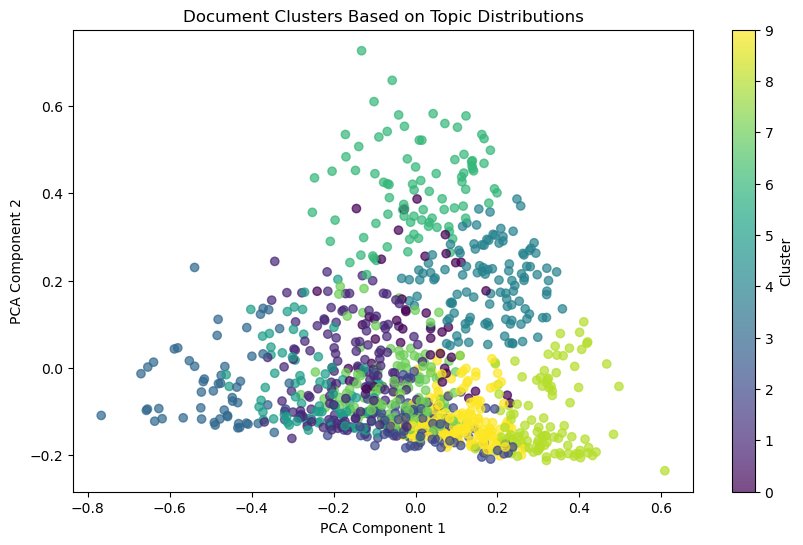

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
topic_matrix_2D = pca.fit_transform(topic_matrix)

plt.figure(figsize=(10, 6))
plt.scatter(topic_matrix_2D[:, 0], topic_matrix_2D[:, 1], c=clusters, cmap="viridis", alpha=0.7)
plt.colorbar(label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Document Clusters Based on Topic Distributions")
plt.show()

t-SNE for Cluster Visualization

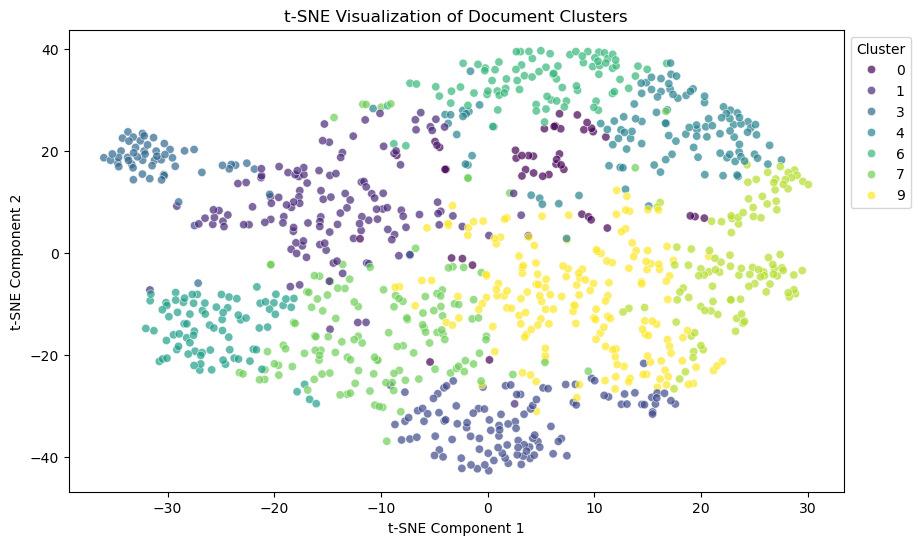

In [45]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce dimensions to 2D for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
topic_matrix_2D = tsne.fit_transform(topic_matrix)

# Plot t-SNE visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=topic_matrix_2D[:, 0], y=topic_matrix_2D[:, 1], hue=clusters, palette="viridis", alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Document Clusters")
plt.legend(title="Cluster", bbox_to_anchor=(1, 1))
plt.show()

Word Clouds for Each Cluster

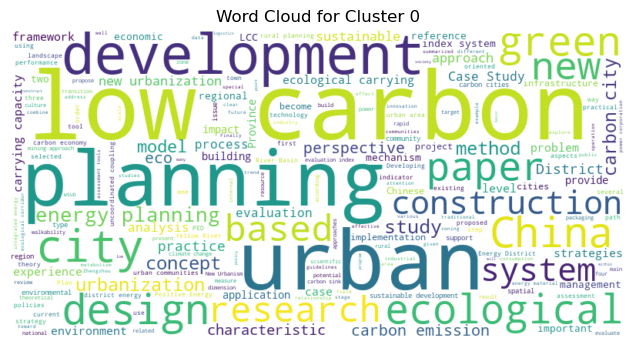

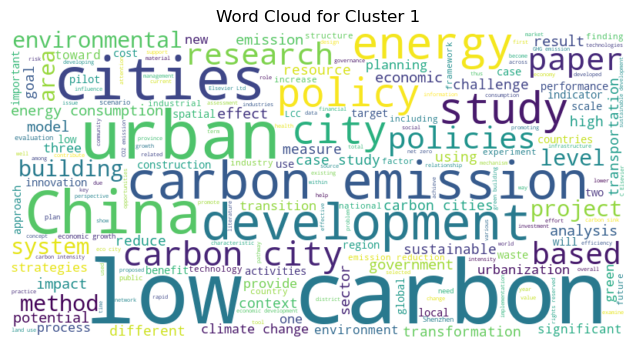

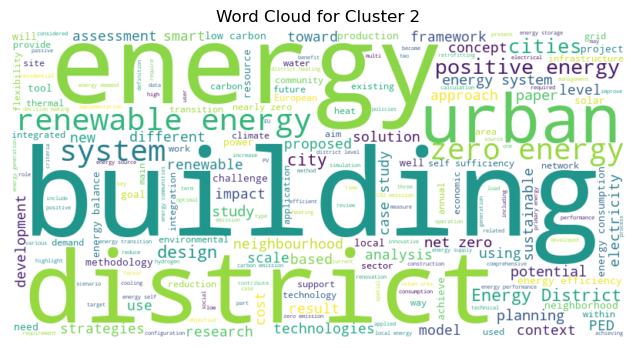

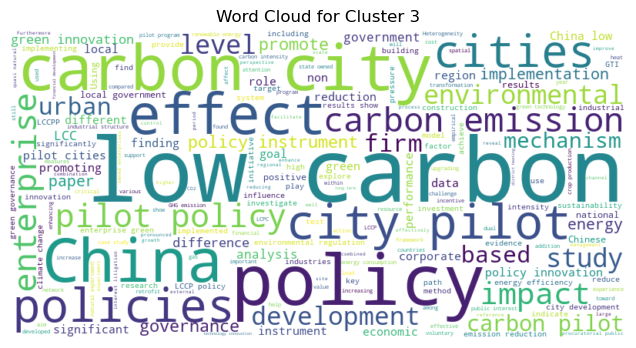

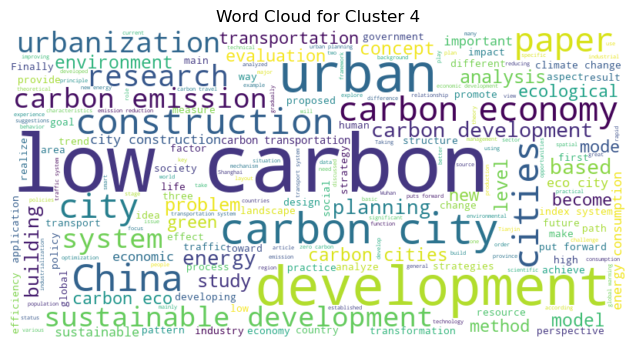

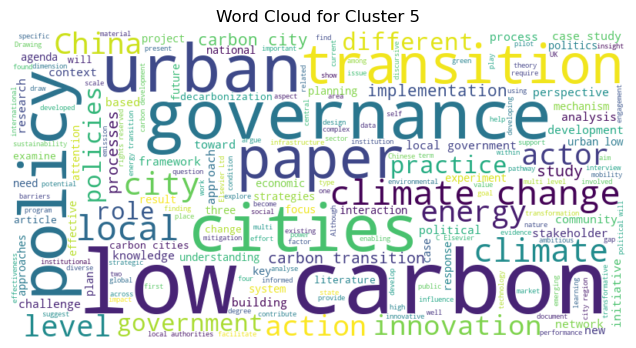

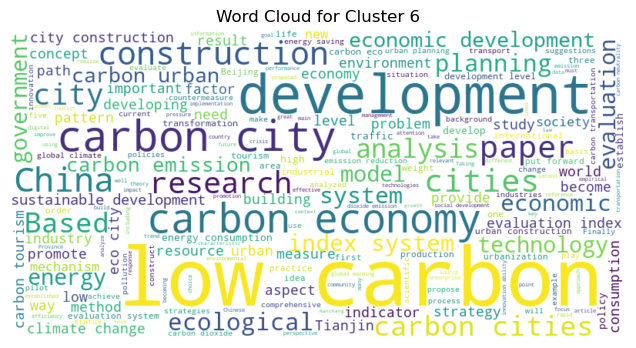

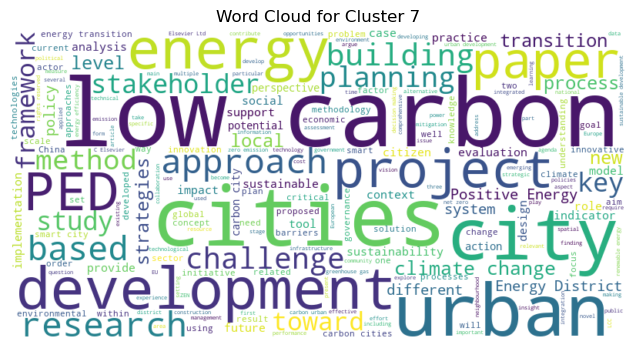

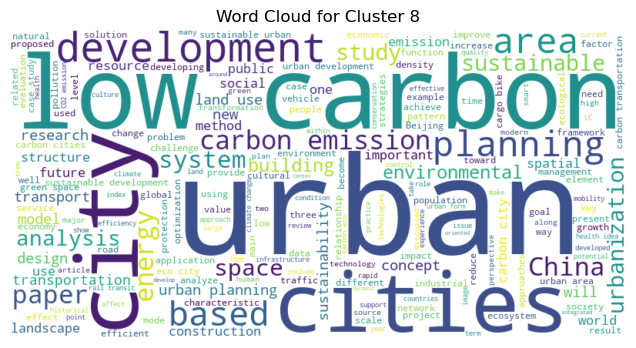

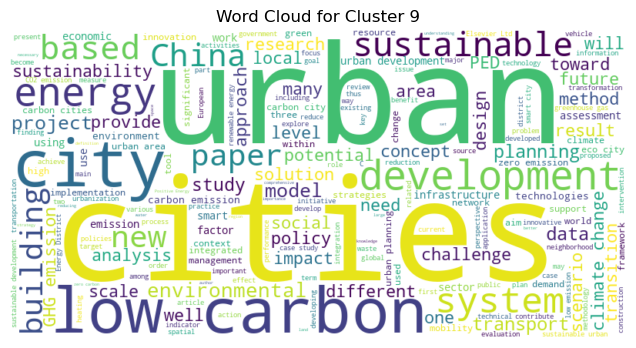

In [46]:
from wordcloud import WordCloud

for i in range(num_clusters):
    plt.figure(figsize=(8, 4))
    cluster_docs = topics_df[topics_df["Cluster"] == i]["Text"]
    text = " ".join(cluster_docs)  # Merge all texts in the cluster

    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {i}")
    plt.show()


Bar Chart of Top Topics per Cluster

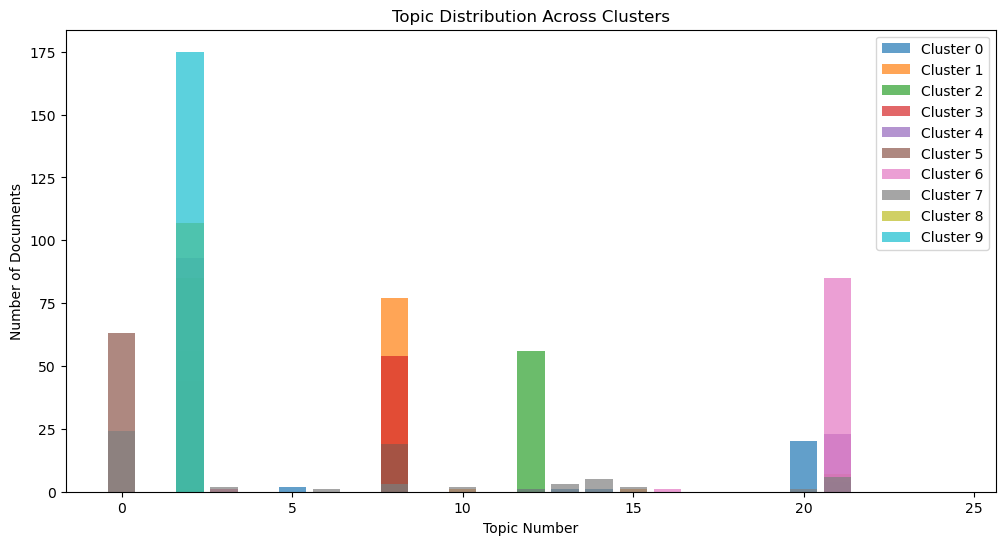

In [47]:
import numpy as np

cluster_topic_counts = np.zeros((num_clusters, lda_model.num_topics))

for i, row in topics_df.iterrows():
    cluster_topic_counts[row["Cluster"], row["Dominant_Topic"]] += 1

plt.figure(figsize=(12, 6))
for i in range(num_clusters):
    plt.bar(range(lda_model.num_topics), cluster_topic_counts[i], alpha=0.7, label=f"Cluster {i}")

plt.xlabel("Topic Number")
plt.ylabel("Number of Documents")
plt.title("Topic Distribution Across Clusters")
plt.legend()
plt.show()

Heatmap of Topic Distributions Across Clusters

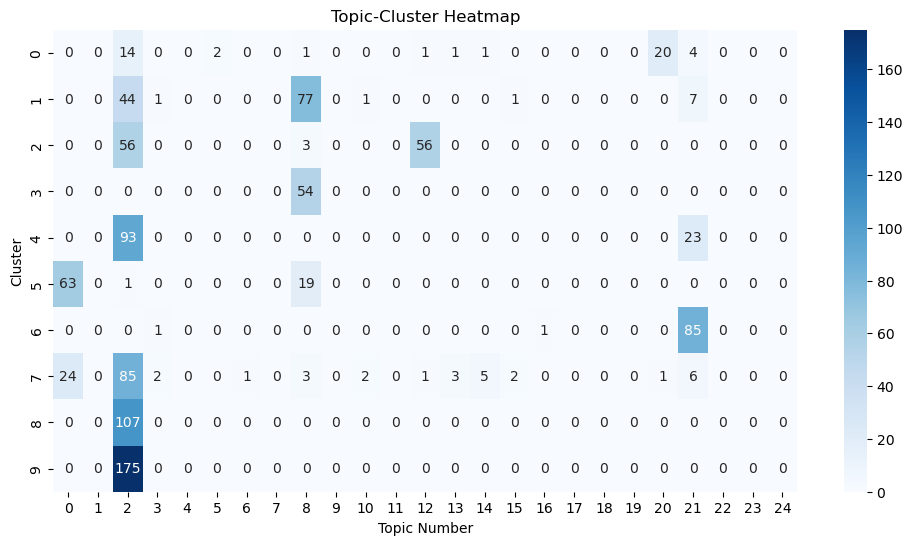

In [48]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_topic_counts, cmap="Blues", annot=True, fmt=".0f")
plt.xlabel("Topic Number")
plt.ylabel("Cluster")
plt.title("Topic-Cluster Heatmap")
plt.show()

Dendrogram for Hierarchical Clustering

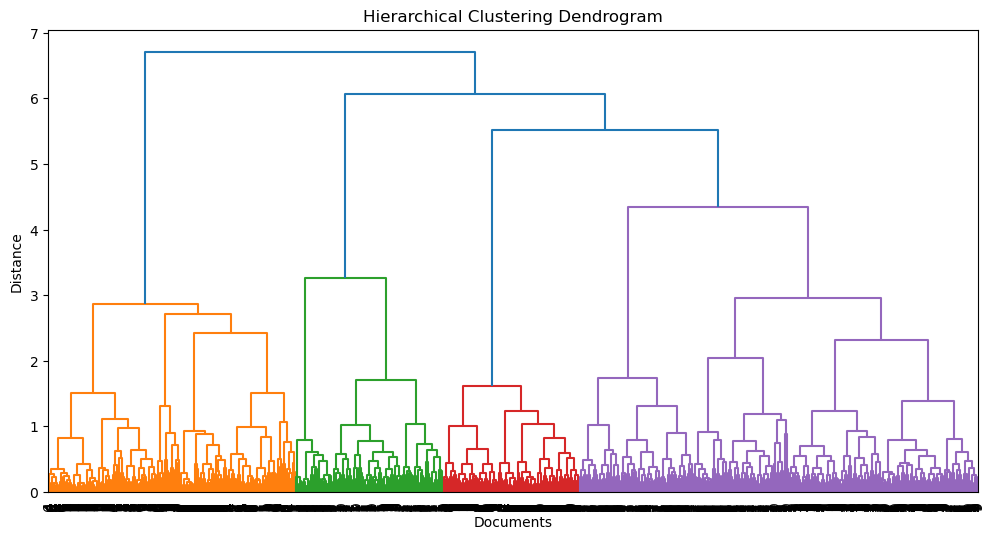

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(topic_matrix, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=clusters, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Documents")
plt.ylabel("Distance")
plt.show()